In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df = pd.read_csv('sample_data/personality_dataset.csv')


In [73]:
df


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [75]:
df.describe()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [76]:
df.isnull().sum()


,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [77]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerik:", num_cols)
print("Kategorikal:", cat_cols)


Numerik: Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')
Kategorikal: Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


In [78]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df.isnull().sum()


,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [80]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.494828,3.942759,3.000000,6.235172,3.552069
std,3.441971,2.875987,2.221597,4.237255,2.894794
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


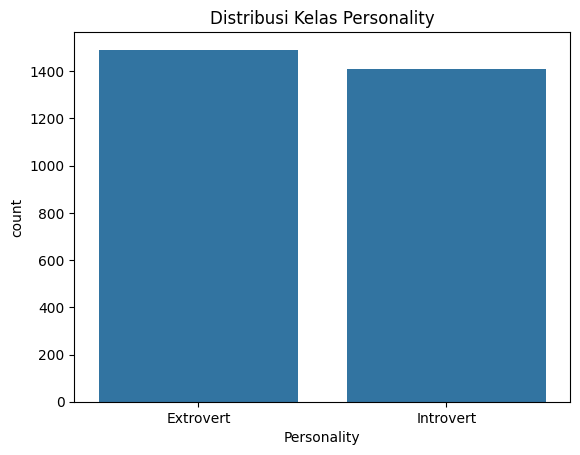

In [81]:
target = 'Personality'

sns.countplot(x=target, data=df)
plt.title("Distribusi Kelas Personality")
plt.show()


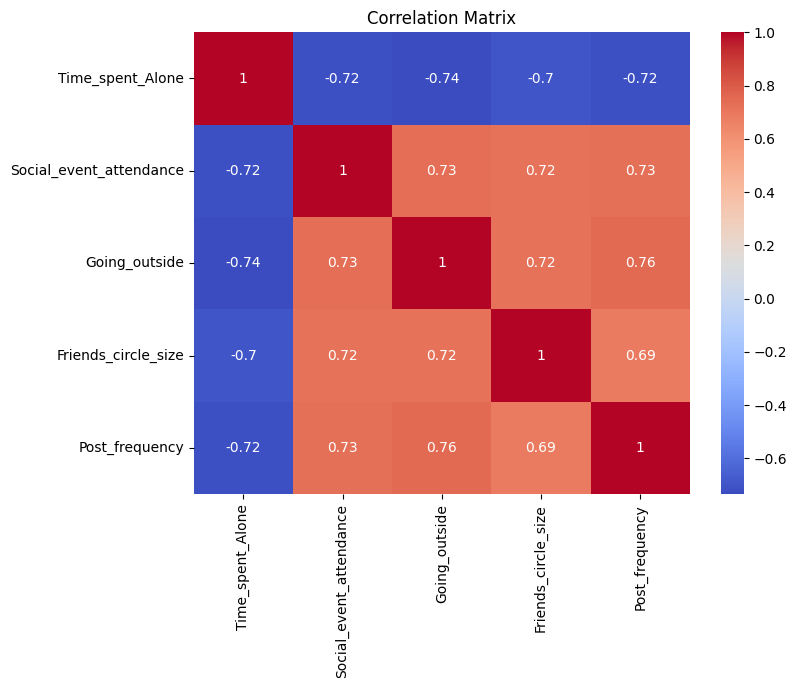

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [83]:
X = df.drop(columns=[target])
y = df[target]

y = y.map({'Introvert': 0, 'Extrovert': 1})


In [84]:
X = pd.get_dummies(X, drop_first=True)


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [87]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [88]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

y_pred  = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:,1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_proba))


Accuracy : 0.9120689655172414
Precision: 0.9158249158249159
Recall   : 0.912751677852349
F1-score : 0.9142857142857143
AUC      : 0.9212420867247371


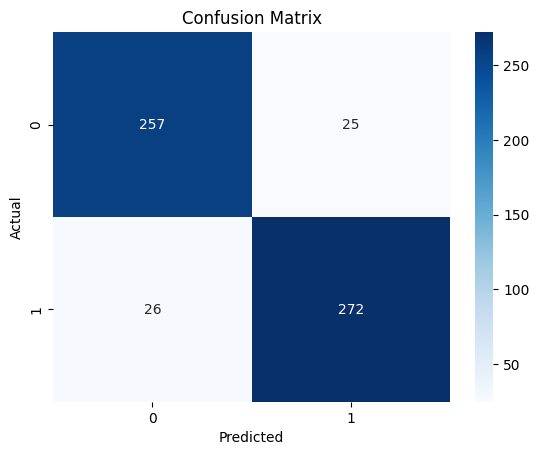

In [89]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.81574795 0.04539078]


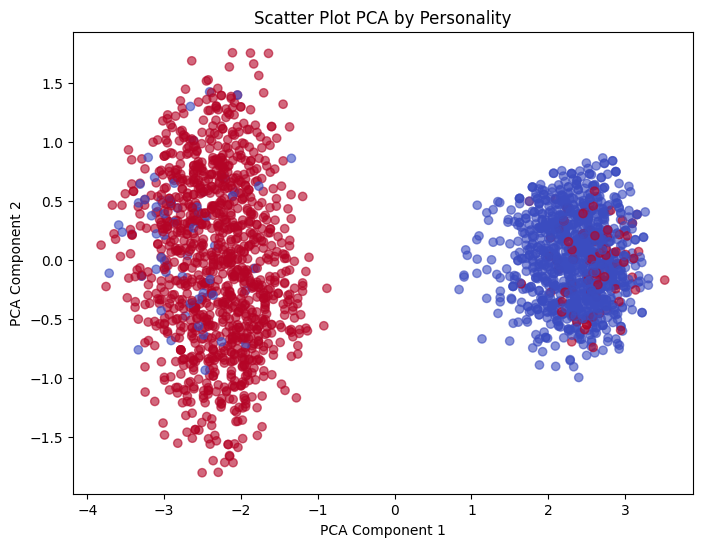

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y_train,
    cmap='coolwarm',
    alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Scatter Plot PCA by Personality")
plt.show()


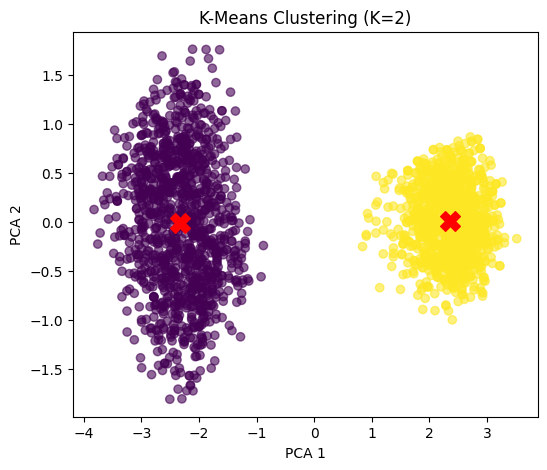

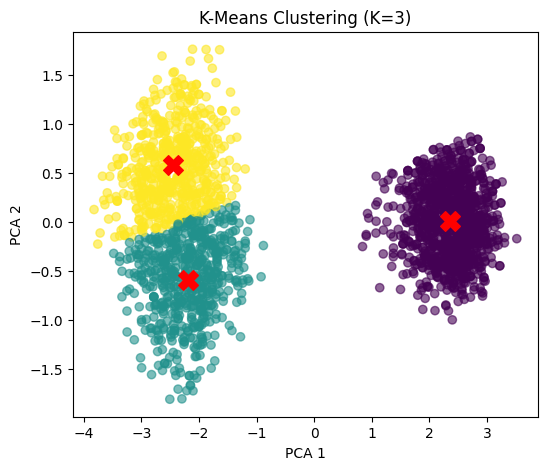

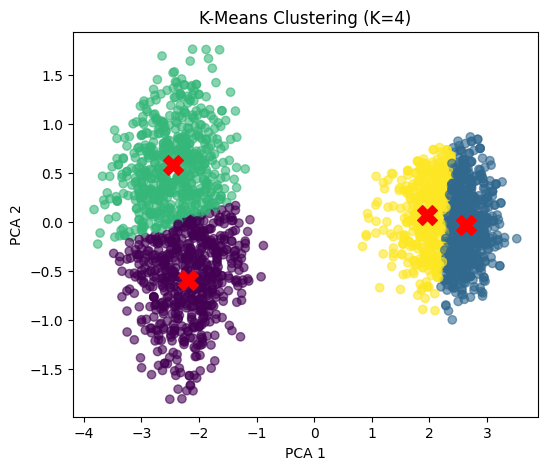

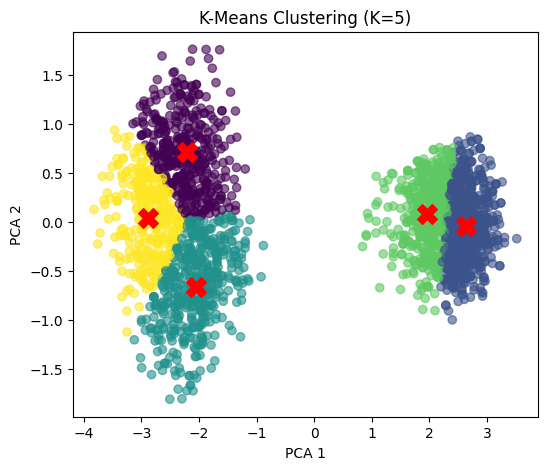

In [92]:
from sklearn.cluster import KMeans

for k in range(2, 6):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=20,
        random_state=42
    )

    labels = kmeans.fit_predict(X_pca)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(6,5))
    plt.scatter(
        X_pca[:,0],
        X_pca[:,1],
        c=labels,
        cmap='viridis',
        alpha=0.6
    )
    plt.scatter(
        centroids[:,0],
        centroids[:,1],
        c='red',
        s=200,
        marker='X'
    )

    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()


In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [94]:
rf_pred  = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:,1]

print("Accuracy :", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1-score :", f1_score(y_test, rf_pred))
print("AUC      :", roc_auc_score(y_test, rf_proba))


Accuracy : 0.9103448275862069
Precision: 0.9183673469387755
Recall   : 0.9060402684563759
F1-score : 0.9121621621621622
AUC      : 0.9474808415441001


In [96]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, rf_pred)
    ],
    "Recall":[
        recall_score(y_test, y_pred),
        recall_score(y_test, rf_pred)
    ],
    "F1-score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, rf_pred)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, rf_proba)
    ]
})

comparison


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.912069,0.915825,0.912752,0.914286,0.921242
1,Random Forest,0.910345,0.918367,0.906040,0.912162,0.947481
